# Analysis new simulations of 10M Muons
In this notebook, we analyze the new simulations by CJ.
He has simulated 10M muons with a new geometry (*introducing ROI volume to force intermediate steps and avoiding the pileup of energy of particles entering/leaving the ROI*).
Moreover, we reprocess also the Ar39 simulations with `Q.E.=0.20`.

In [1]:
import os, glob, numpy as np, pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [25, 15]
plt.rcParams.update({'font.size': 18})

In [3]:
def load_dataframe_from_files(dirin, fileprefix, max_files=1000):
    import glob
    files = glob.glob(os.path.join(dirin, fileprefix))
    print("[Info] Loading {} files wt prefix:\n{}".format(len(files), fileprefix))
    df = pd.read_csv(files[0], comment='#', index_col=False)
    for file in files[1:max_files]:
        print(".", end='')
        dftmp = pd.read_csv(file, comment='#', index_col=False)
        df = pd.concat([df, dftmp])
    print("")
    return df

In [4]:
dirin = os.path.join("..", "..", "Data", "OutputProcessing", "Ar39_07_27_2020", "Ar39_Snapshots")
fileinprefix = "Snapshot1Ar39*.csv"

df_ar39 = load_dataframe_from_files(dirin, fileinprefix)
df_ar39 = df_ar39[df_ar39.columns[:-1]]

[Info] Loading 100 files wt prefix:
Snapshot1Ar39*.csv
...................................................................................................


In [5]:
dirin = os.path.join("..", "..", "Data", "OutputProcessing", "Muons_07_27_2020", "Muons_Snapshots")
fileinprefix = "SnapshotMuon*.csv"

df_mu = load_dataframe_from_files(dirin, fileinprefix)
df_mu = df_mu[df_mu.columns[:-1]]

[Info] Loading 100 files wt prefix:
SnapshotMuon*.csv
...................................................................................................


In [37]:
dirin = os.path.join("..", "..", "Data", "OutputProcessing", "Muons_Old", "Muons_Snapshots")
fileinprefix = "SnapshotOldMuon*.csv"

df_oldmu = load_dataframe_from_files(dirin, fileinprefix)
df_oldmu = df_oldmu[df_mu.columns[:-1]]

[Info] Loading 100 files wt prefix:
SnapshotOldMuon*.csv
...................................................................................................


In [38]:
print("[Info] Loaded {} Ar39 decays, with maximum {} PE detected".format(len(df_ar39), df_ar39.pedetected.max()))
print("[Info] Loaded {} Muons, with maximum {} PE detected (OLD 2M RUN)".format(len(df_oldmu), df_oldmu.pedetected.max()))
print("[Info] Loaded {} Muons, with maximum {} PE detected (NEW 10M RUN)".format(len(df_mu), df_mu.pedetected.max()))

[Info] Loaded 5303515 Ar39 decays, with maximum 30 PE detected
[Info] Loaded 13793 Muons, with maximum 430933 PE detected (OLD 2M RUN)
[Info] Loaded 157057 Muons, with maximum 2011444 PE detected (NEW 10M RUN)


### Observations: 
#### Ar39 Detection Probability
Considering a `Q.E.=0.20`, we observe a lower Detection Probability (as expected).

In the previous simulations wt `Q.E.=0.40`, we had more than 6M events wt `NPE>0`. Then, the detection probability was about `64.17%`.

Now, using `Q.E.=0.20`, we have 5M events wt `NPE>0`. Then, the detection probability was about `53.04%`.

Referring to the preliminary estimation on the **expected trigger rate**, we update it as `E[decay rate] * Det.Pr = 3666 * .5304 = 1945 Hz`.

#### Number of Mu events
In the first Muons run, CJ simulated `2M` muons and about `14K` events present a non-zero detection (`.75%`).
These data (*dataframe df_oldmu*) have been recomputed wt the same `Q.E.=0.20`.

Now, having introduced a larger sample of MUSUN starting conditions (*sampling from 26M musun instances*), we obtain a statistics larger than expected. 
In fact, it has more than `150K` events with non-zero detection for `10M` simulations (`1.6%`).

Considering the increase of the simulated data `x5`, we expect also the increase in the number of events of `x5`.
Conversely, the increase of events is more than `x10`.

# Plot PE Spectrum

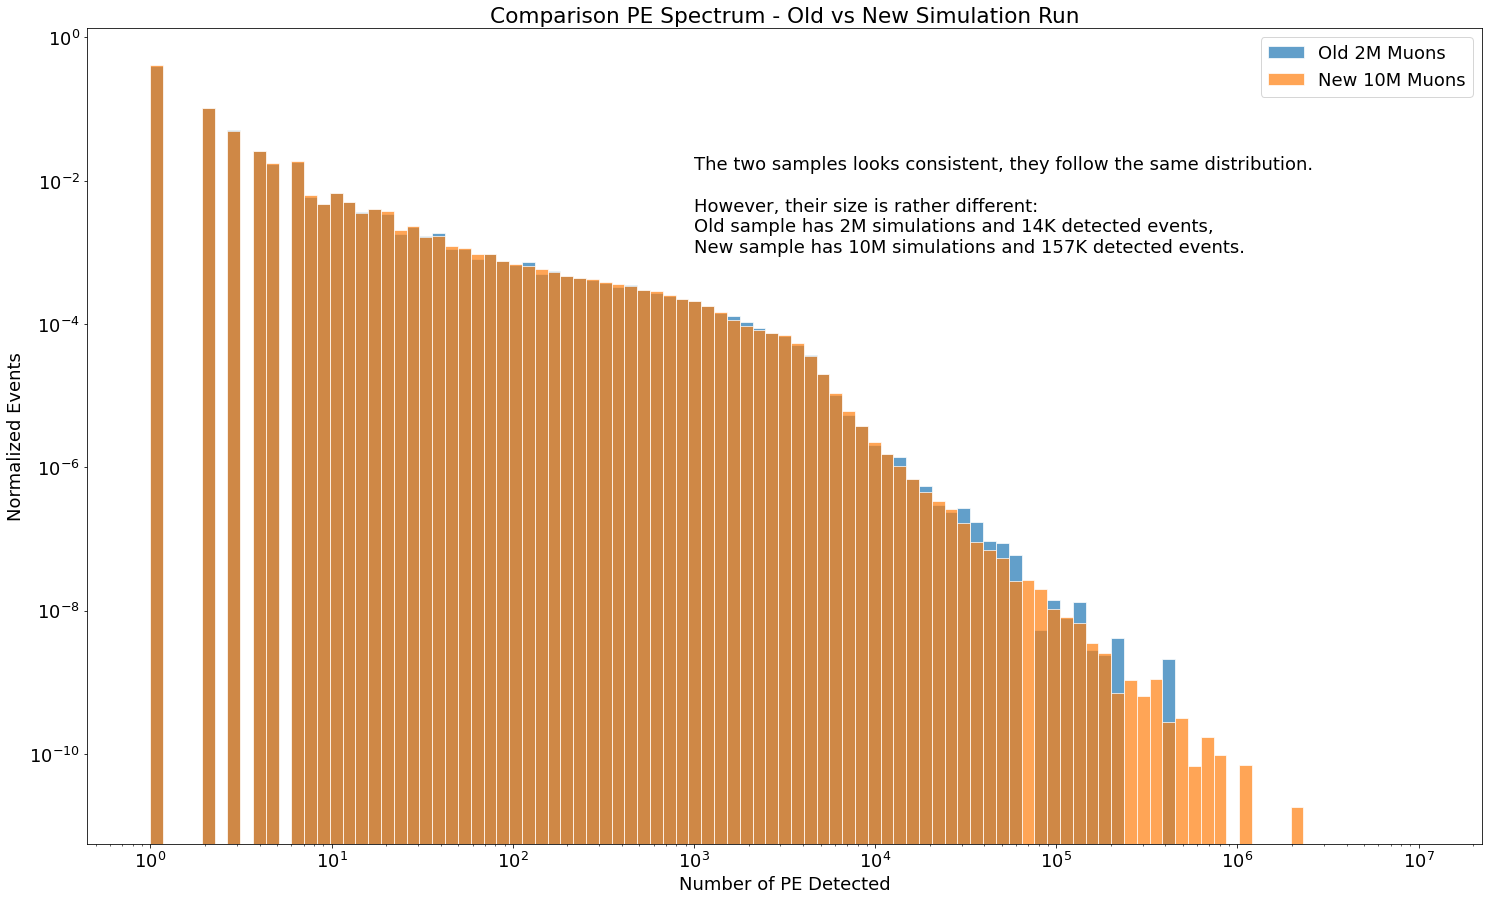

In [65]:
bins = np.logspace(0, 7, 100)
plt.hist(df_oldmu.pedetected, bins=bins, label="Old 2M Muons", density=True, edgecolor='w', alpha=0.70)
plt.hist(df_mu.pedetected, bins=bins, label="New 10M Muons", density=True, edgecolor='w', alpha=0.70)
plt.xscale("log")
plt.yscale("log")
plt.title("Comparison PE Spectrum - Old vs New Simulation Run")
plt.xlabel("Number of PE Detected")
plt.ylabel("Normalized Events")
plt.text(1000, 0.001, "The two samples looks consistent, they follow the same distribution.\n\n" \
                     "However, their size is rather different:\n" \
                     "Old sample has 2M simulations and 14K detected events,\n" \
                     "New sample has 10M simulations and 157K detected events.")
plt.legend()
plt.show()

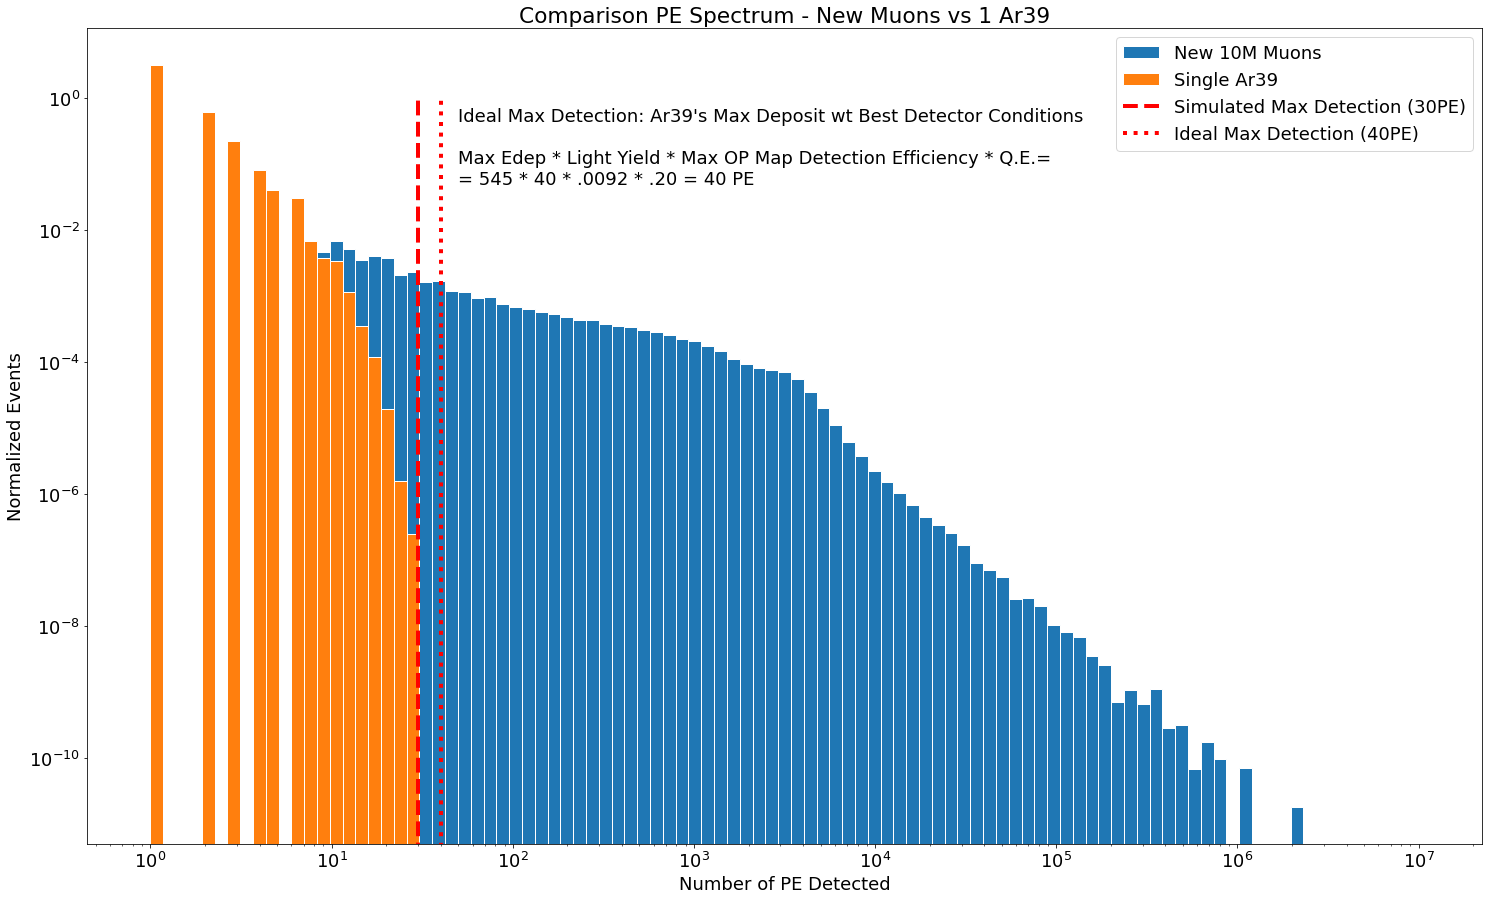

In [59]:
bins = np.logspace(0, 7, 100)
plt.hist(df_mu.pedetected, bins=bins, label="New 10M Muons", density=True, edgecolor='w')
plt.hist(df_ar39.pedetected, bins=bins, label="Single Ar39", density=True, edgecolor='w')
plt.vlines(30, 0, 1, label="Simulated Max Detection (30PE)", color="red", linestyles="dashed", linewidth=4)
plt.vlines(40, 0, 1, label="Ideal Max Detection (40PE)", color="red", linestyles="dotted", linewidth=4)
plt.xscale("log")
plt.yscale("log")
plt.title("Comparison PE Spectrum - New Muons vs 1 Ar39")
plt.xlabel("Number of PE Detected")
plt.ylabel("Normalized Events")
plt.text(50, 0.05, "Ideal Max Detection: Ar39's Max Deposit wt Best Detector Conditions\n\n" \
                       "Max Edep * Light Yield * Max OP Map Detection Efficiency * Q.E.=\n" \
                       "= 545 * 40 * .0092 * .20 = 40 PE")
plt.legend()
plt.show()